In [1]:
using StaticArrays, DifferentialEquations, DynamicalSystems, CairoMakie

In [2]:
function TM(u, p, t)

    U(y) = U0 + ΔU0 / ( 1 + exp( -50*(y-ythr) ) )
    σ(x) = 1 / ( 1 + exp( -20*(x-xthr) ) )

    E, x, y = u
    α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0 = p

    du1 = (-E + α * log( 1 + exp( (J * U(y) * x * E + I0  ) / (α) ) ) ) / τ
    du2 = (1-x)/τD - U(y)*x*E
    du3 = (-y)/τy+β*σ(x)

    return SVector(du1, du2, du3)
end

TM (generic function with 1 method)

In [3]:
function count_floats(a, b)
           count = 0
           if a > b
               a, b = b, a
           end
           while a < b
               a = nextfloat(a)
               count += 1
           end
           return count
end

count_floats (generic function with 1 method)

In [10]:
t = 250.0
tt = 250.0
tstep = 0.001
trange = range(0.0, t, step = tstep);
integ_set = (alg = RK4(), adaptive = false, dt = tstep);

In [11]:
const τ = 0.013;  const τD = 0.080;  const τy = 3.3;  const J = 3.07;  const β = 0.300
const xthr = 0.75; const ythr = 0.4
const α = 1.58; const U0 = 0.3;  const ΔU0 = 0.305;

In [12]:
I0 = -1.4
p =  [α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0]
u0 = [8.39353, 0.73803, 0.429055]
ds = ContinuousDynamicalSystem(TM, u0, p)

3-dimensional continuous dynamical system
 state:       [8.39353, 0.73803, 0.429055]
 rule f:      TM
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [1.58, 0.013, 0.08, 3.3, 3.07, 0.75, 0.4, 0.3, 0.305, 0.3, -1.4]

In [13]:
count_floats(Float32(-1.40), Float32(-1.87036))

3945666

In [17]:
I0range = range( -1.4, -1.87036, length = 501 )

idx_control_parameter = 11

idx_fix = 2; fixed_value = 0.81
surface = (idx_fix, fixed_value)
setting_root = (xrtol = 1e-13, atol = 1e-13);

In [18]:
I0range

-1.4:-0.00094072:-1.87036

In [19]:
idx_save = 1
output = produce_orbitdiagram(ds, surface, idx_save,
                        idx_control_parameter, I0range;
                        tfinal = t, Ttr = tt,
                        printparams = true,
                        diffeq = integ_set, rootkw = setting_root
                        );

parameter = -1.4
parameter = -1.40094072
parameter = -1.40188144
parameter = -1.40282216
parameter = -1.40376288
parameter = -1.4047036
parameter = -1.40564432
parameter = -1.40658504
parameter = -1.40752576
parameter = -1.40846648
parameter = -1.4094072
parameter = -1.41034792
parameter = -1.41128864
parameter = -1.41222936
parameter = -1.41317008
parameter = -1.4141108
parameter = -1.41505152
parameter = -1.41599224
parameter = -1.41693296
parameter = -1.41787368
parameter = -1.4188144
parameter = -1.41975512
parameter = -1.42069584
parameter = -1.42163656
parameter = -1.42257728
parameter = -1.423518
parameter = -1.42445872
parameter = -1.42539944
parameter = -1.42634016
parameter = -1.42728088
parameter = -1.4282216
parameter = -1.42916232
parameter = -1.43010304
parameter = -1.43104376
parameter = -1.43198448
parameter = -1.4329252
parameter = -1.43386592
parameter = -1.43480664
parameter = -1.43574736
parameter = -1.43668808
parameter = -1.4376288
parameter = -1.43856952
paramete

parameter = -1.7245484
parameter = -1.72548912
parameter = -1.72642984
parameter = -1.72737056
parameter = -1.72831128
parameter = -1.729252
parameter = -1.73019272
parameter = -1.73113344
parameter = -1.73207416
parameter = -1.73301488
parameter = -1.7339556
parameter = -1.73489632
parameter = -1.73583704
parameter = -1.73677776
parameter = -1.73771848
parameter = -1.7386592
parameter = -1.73959992
parameter = -1.74054064
parameter = -1.74148136
parameter = -1.74242208
parameter = -1.7433628
parameter = -1.74430352
parameter = -1.74524424
parameter = -1.74618496
parameter = -1.74712568
parameter = -1.7480664
parameter = -1.74900712
parameter = -1.74994784
parameter = -1.75088856
parameter = -1.75182928
parameter = -1.75277
parameter = -1.75371072
parameter = -1.75465144
parameter = -1.75559216
parameter = -1.75653288
parameter = -1.7574736
parameter = -1.75841432
parameter = -1.75935504
parameter = -1.76029576
parameter = -1.76123648
parameter = -1.7621772
parameter = -1.76311792
para

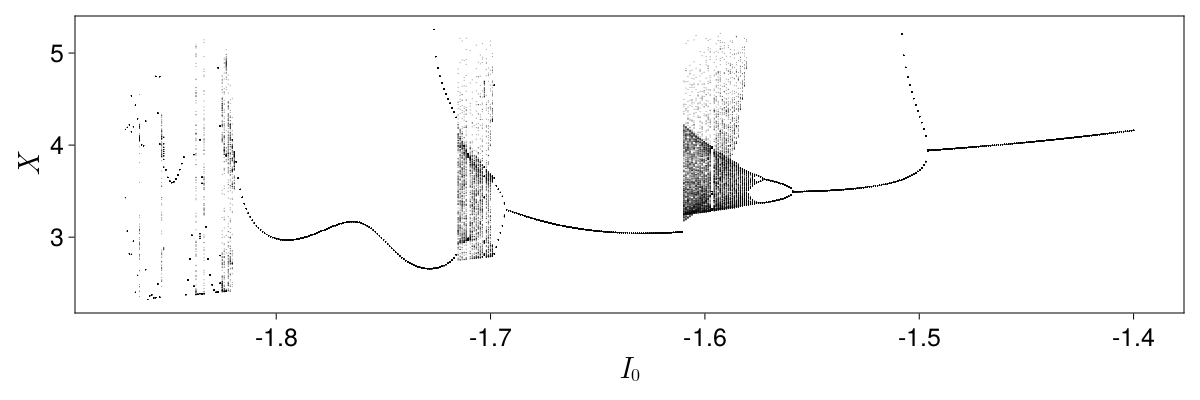

In [20]:
f = Figure(resolution = (1200, 400))
axis = Axis(f[1,1]; xlabel = L"I_0", ylabel = L"X", xlabelsize = 30, ylabelsize = 30,
            xticklabelsize = 25, yticklabelsize = 25, xgridvisible = false, ygridvisible = false)
for (j, p) in enumerate(I0range)
    scatter!(axis, fill(p, length(output[j])), output[j]; color = ("black", 0.5), markersize = 1.5)
end
f